<a href="https://colab.research.google.com/github/kshitijzutshi/Teleco-Customer-Churn-Prediction/blob/main/Predicting_Customer_Churn_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Abstract

Customer churn, also known as attrition, occurs when a customer stops
doing business with a company. Understanding and detecting churn is the
first step to retaining these customers and improving the company’s
offerings.

The task is to perform a **churn analysis** from a [Kaggle data set](https://www.kaggle.com/blastchar/telco-customer-churn) which gives the
customer information data of a telecommunications company (Telco)
trying to better understand their customer churn likelihood. 

This is done by first taking a deep dive into the **Exploratory Data Analysis**
(EDA) process to get a better understanding of the data. Post the data cleaning and EDA we move towards **Feature selection** process, which will help us in two ways - 
1. **Reduce our dimensionality** for processing and data modeling.
2. Get insights about *what independent variables are more signifiicant in predicting our **Target** variable(Customer Churn)*

For feature selection we use **SelectKBest** and **Chi squared test**(as its a classification problem this test can be used). 

By using the results of Random forest classifier '**Gini importance**' output, visualization techniques we are able to categorize significant and insignificant features. Thus answering questions pertaining to - what predictor variables are most important in deciding if customers churn or not.


In [ ]:
!pip install fitter

### 1. Initializing required libraries for data manupilation/data processing

In [ ]:
import pandas as pd
import seaborn as sns
from numpy import unique
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from pandas.plotting import scatter_matrix
# Building a model imports
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,mean_absolute_error, precision_score, cohen_kappa_score, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from fitter import Fitter, get_common_distributions, get_distributions
# from sklearn.linear_model import LinearRegression
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

### 2. Reading the Dataset : Using Pandas to read CSV file

Looking at the predictor variables in the dataset - 


**Target**:

Churn - Whether the customer churned or not(Yes,No)

**Numeric Features:**

• Tenure — Number of months the customer has been with the company

• MonthlyCharges — The monthly amount charged to the customer

• TotalCharges — The total amount charged to the customer

**Categorical Features:**

• CustomerID

• Gender — M/F

• SeniorCitizen — Whether the customer is a senior citizen or not (1, 0)

• Partner — Whether customer has a partner or not (Yes, No)

• Dependents — Whether customer has dependents or not (Yes, No)

• PhoneService — Whether the customer has a phone service or not (Yes,
No)

• MulitpleLines — Whether the customer has multiple lines or not (Yes,
No, No Phone Service)

• InternetService — Customer’s internet service type (DSL, Fiber Optic,
None)

• OnlineSecurity — Whether the customer has Online Security add-on
(Yes, No, No Internet Service)

• OnlineBackup — Whether the customer has Online Backup add-on (Yes,
No, No Internet Service)

• DeviceProtection — Whether the customer has Device Protection add-on
(Yes, No, No Internet Service)

• TechSupport — Whether the customer has Tech Support add-on (Yes,
No, No Internet Service)

• StreamingTV — Whether the customer has streaming TV or not (Yes,
No, No Internet Service)

• StreamingMovies — Whether the customer has streaming movies or not
(Yes, No, No Internet Service)

• Contract — Term of the customer’s contract (Monthly, 1-Year, 2-Year)

• PaperlessBilling — Whether the customer has paperless billing or not
(Yes, No)

• PaymentMethod — The customer’s payment method (E-Check, Mailed
Check, Bank Transfer (Auto), Credit Card (Auto))

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/kshitijzutshi/Teleco-Customer-Churn-Prediction/main/dataset/telco_dataset.csv')
df = pd.DataFrame(data)

# Get an overview of the dataset
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1852,3669-OYSJI,Male,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Credit card (automatic),46.20,46.2,Yes
53,7495-OOKFY,Female,1,Yes,No,8,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Credit card (automatic),80.65,633.3,Yes
4203,4291-YZODP,Female,0,No,Yes,7,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.05,96.8,No
1487,5035-PGZXH,Female,0,No,No,56,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Electronic check,106.80,5914.4,No
603,2001-MCUUW,Male,0,No,No,46,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,No,Electronic check,108.65,4903.2,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
tenure_arr = pd.Series(df['tenure']).array
tenure_arr

<PandasArray>
[ 1, 34,  2, 45,  2,  8, 22, 10, 28, 62,
 ...
 38, 67, 19, 12, 72, 24, 72, 11,  4, 66]
Length: 7043, dtype: int64

In [ ]:
monthly_charges_arr = pd.Series(df['MonthlyCharges']).array
monthly_charges_arr

<PandasArray>
[ 29.85,  56.95,  53.85,   42.3,   70.7,  99.65,   89.1,  29.75,  104.8,
  56.15,
 ...
   69.5, 102.95,   78.7,  60.65,  21.15,   84.8,  103.2,   29.6,   74.4,
 105.65]
Length: 7043, dtype: float64

In [ ]:
total_charges_arr = pd.Series(df['TotalCharges']).array
total_charges_arr

<PandasArray>
[  29.85,  1889.5,  108.15, 1840.75,  151.65,   820.5,  1949.4,   301.9,
 3046.05, 3487.95,
 ...
 2625.25, 6886.25,  1495.1,   743.3,  1419.4,  1990.5,  7362.9,  346.45,
   306.6,  6844.5]
Length: 7043, dtype: float64

### 3. Data Cleaning - Cleaning the dataset to remove insignificant data

In order to do data cleaning we need to select the significant independent variables in out dataset and filter out the insignificant independent variables/features.

Following are things to check while performing data cleaning on a data set:

Reference source - https://machinelearningmastery.com/basic-data-cleaning-for-machine-learning/

    1. Messy Datasets - missing values check and drop irrelevant coloumns
    2. Identify Columns That Contain unique Value
    3. Consider Columns That Have Very Few Values
    4. Remove Columns That Have A Low Variance
    5. Outlier Detection and removal


### 1. Messy Datasets - missing values check & drop customer ID col

In [ ]:
# Check for null values
df.drop('customerID', axis='columns', inplace=True)
df.isna().any()

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

Since there were **11 missing values in the Total Charges** coloumn. Given the large dataset, I decided to drop the rows instead of filling the missing values with dummy data.

In [ ]:
df.dropna(axis=0, inplace=True)

In [ ]:
# Check for null values
df.isna().any()

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

Total number of rows are reduced to 7032 from 7043, means 11 rows were dropped.

In [ ]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


#### 2. Identify Columns That Contain unique Values

In [ ]:
# Checking number of unique values in each column
def print_unique_col_values(df):
  for col in df:
    if df[col].dtype == 'object':
      print(f'{col} : {df[col].unique()}')

print_unique_col_values(df)
print('\n')
df.nunique()

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']




gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

We can also **clean up the categorical coloumns** such that, for example - places with Yes, No, No internet service/ No phone service -> can be converted to a Yes and No.

In [ ]:
df.replace('No internet service', 'No', inplace=True)
df.replace('No phone service', 'No', inplace=True)
print_unique_col_values(df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


Replace Yes, No with 1 and 0

In [ ]:
yes_no_col = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']
for col in yes_no_col:
  df[col].replace({'Yes':1, 'No':0}, inplace=True)
# print_unique_col_values(df)

In [ ]:
# Since there are just 2 genders, we can assign 0 and 1
df['gender'].replace({'Female':1, 'Male':0}, inplace=True)

### For categorical variables with more types, we got with **one-hot encoding**

In [ ]:
# Reference - https://www.marsja.se/how-to-use-pandas-get_dummies-to-create-dummy-variables-in-python/

categorical_cols = ['InternetService', 'Contract', 'PaymentMethod']
# write a simple function for one hot encoding a categorical column
def onehot_column(df, categorical_col):
  dummy_columns = pd.get_dummies(df[categorical_col], prefix=categorical_col)
  # axis{0/’index’, 1/’columns’}, default 0 -> The axis to concatenate along.
  return pd.concat([df.drop(columns=categorical_col), dummy_columns], axis=1)

for col in categorical_cols:
  df = onehot_column(df, col)



In [ ]:
df.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5369,1,0,0,0,34,1,0,0,0,0,0,0,0,0,20.35,673.20,0,0,0,1,1,0,0,0,0,0,1
6016,0,0,0,0,68,1,1,0,1,1,1,1,1,0,108.45,7176.55,1,0,1,0,0,1,0,0,0,1,0
5737,0,0,1,1,18,1,0,1,0,1,1,1,1,0,83.25,1611.15,0,1,0,0,1,0,0,0,0,1,0
7033,0,0,0,0,38,1,0,0,0,0,0,0,0,1,69.50,2625.25,0,0,1,0,1,0,0,0,1,0,0


In [ ]:
# Find zero values.
arr = ['tenure', 'MonthlyCharges', 'TotalCharges']
for col in arr:
  zero_values_count = df[col].isin([0]).sum()
  print(f'{col} : {zero_values_count}')


# Since the Senior Citizen coloumn is a categorical one with 0/1 values, the zero count will be high here.

tenure : 0
MonthlyCharges : 0
TotalCharges : 0


### 3. Remove Columns That Have A Low Variance

Coloumns with very low varience, say 0.0 needs to be handled as low varience suggests small changes to the estimate of the target function with changes to the training dataset.

The coloumns what are continuous values have significant varience, so we can keep them.

In [ ]:
df.var()

SeniorCitizen     1.360459e-01
tenure            6.024698e+02
MonthlyCharges    9.051658e+02
TotalCharges      5.138252e+06
dtype: float64

### 4. Identify and Delete Rows that Contain Duplicate Data

Since most of the independent variables are categorical, we dont have duplicate data to identify or delete.

### 5. Outlier Detection in Independent features in dataset

In [ ]:
# Creating histogram
# fig, ax = plt.subplots(figsize =(10, 7))
# sns.boxplot(tenure_arr)
 
# Show plot
  # plt.show()

# Generic Outlier detection Function
outliers = []
def detect_outliers(feature_arr):
  threshold = 3
  mean = np.mean(np.array(feature_arr))
  std = np.std(np.array(feature_arr))
  quartile1, quartile3 = np.percentile(feature_arr, [25,75])
  # print(quartile1, quartile3)
# IQR 
  # print('IQR :', quartile3-quartile1)

  upperBound = quartile3+(1.5*(quartile3-quartile1))
  lowerBound = quartile1-(1.5*(quartile3-quartile1))
  # print('mean and std : ', mean, std)
  for i in feature_arr:
    zscore = (i-mean)/std
    if np.abs(zscore) > threshold:
      outliers.append(i)
  
  return outliers

# outlierDet = detect_outliers(tenure_arr)
# print(outlierDet)

We will find the **outliers** in continuous Independent features like - **Tenure, Monthly charges, Total Charges, Actual Total charges**

### Scaling in Dataset

***Q. Do the ranges of the predictor variables make sense?***


---

In the dataset we have values for columns that are having a **high range** of values -> say in comparing tenure, **monthly charges and total charges** col.
Since there arnt any values that are abnormally large, the ranges do make sense, we can get an idea of same from describe()

Since for classification problem we will use Random forest classifier, that dosent really care about the scale of values, scaling the data is optional. I am doing minMax scalar nevertheless

We use sklearn library's **MinMaxScalar** to convert the values into arange of 0 and 1

In [ ]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.495307,0.162400,0.482509,0.298493,32.421786,0.903299,0.421928,0.286547,0.344852,0.343857,0.290102,0.384386,0.388367,0.592719,64.798208,2283.300441,0.265785,0.343572,0.440273,0.216155,0.551052,0.209329,0.239619,0.219283,0.216297,0.336320,0.228100
std,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.493902,0.452180,0.475354,0.475028,0.453842,0.486484,0.487414,0.491363,30.085974,2266.771362,0.441782,0.474934,0.496455,0.411650,0.497422,0.406858,0.426881,0.413790,0.411748,0.472483,0.419637
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.587500,401.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1397.475000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.862500,3794.737500,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']
scalar = MinMaxScaler()
df[cols_to_scale] = scalar.fit_transform(df[cols_to_scale])

In [ ]:
df.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
359,0,0,1,1,0.577465,1,1,1,0,0,0,1,1,0,0.784577,0.461337,0,0,1,0,0,1,0,0,0,1,0
4936,1,1,0,0,0.619718,1,1,1,1,0,1,1,0,1,0.784080,0.503837,0,0,1,0,1,0,0,0,0,1,0
3060,0,0,1,0,0.338028,0,0,0,0,1,0,1,0,1,0.197512,0.109808,0,1,0,0,0,1,0,0,1,0,0


In [ ]:
tenure_arr = np.array(df.tenure)
monthly_charges_arr = np.array(df.MonthlyCharges)
total_charges_arr = np.array(df.TotalCharges)
# actual_total_charges_arr = np.array(df.actualTotalCharges)

In [ ]:
# Get IQR for Tenure array and Outliers array
quartile1, quartile3 = np.percentile(tenure_arr, [25,75])
print(quartile1, quartile3)
# IQR 
print('IQR :', quartile3-quartile1)

upperBound = quartile3+(1.5*(quartile3-quartile1))
lowerBound = quartile1-(1.5*(quartile3-quartile1))

print('upper bound', upperBound)
print('lower bound', lowerBound)

outlierDet = detect_outliers(tenure_arr)
print('Outliers array : ', outlierDet)


0.11267605633802817 0.7605633802816901
IQR : 0.647887323943662
upper bound 1.732394366197183
lower bound -0.8591549295774649
Outliers array :  []


In [ ]:
# Get IQR for monthly charges array and outliers array
quartile1, quartile3 = np.percentile(monthly_charges_arr, [25,75])
print(quartile1, quartile3)
# IQR 
print('IQR :', quartile3-quartile1)

upperBound = quartile3+(1.5*(quartile3-quartile1))
lowerBound = quartile1-(1.5*(quartile3-quartile1))

print('upper bound', upperBound)
print('lower bound', lowerBound)

outlierDet = detect_outliers(monthly_charges_arr)
print('Outliers array : ', outlierDet)

0.17251243781094527 0.7125621890547263
IQR : 0.5400497512437811
upper bound 1.5226368159203978
lower bound -0.6375621890547263
Outliers array :  []


In [ ]:
# Get IQR for total charges array and outliers array
quartile1, quartile3 = np.percentile(total_charges_arr, [25,75])
print(quartile1, quartile3)
# IQR 
print('IQR :', quartile3-quartile1)

upperBound = quartile3+(1.5*(quartile3-quartile1))
lowerBound = quartile1-(1.5*(quartile3-quartile1))

print('upper bound', upperBound)
print('lower bound', lowerBound)

outlierDet = detect_outliers(total_charges_arr)
print('Outliers array : ', outlierDet)

0.04415531963997231 0.43571861297022846
IQR : 0.39156329333025613
upper bound 1.0230635529656127
lower bound -0.5431896203554119
Outliers array :  []


***Q. Which independent variable have missing data? How much?***


---

From the above data cleaning steps it was known that there were 11 missing values in the dataset that were removed using dropna function since their size relative to total number of rows in dataset was small.



### 4. Visualization and Plots

Lets first visualize the distribution of each feature in the dataset.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efe013786d0>,
      dtype=object)

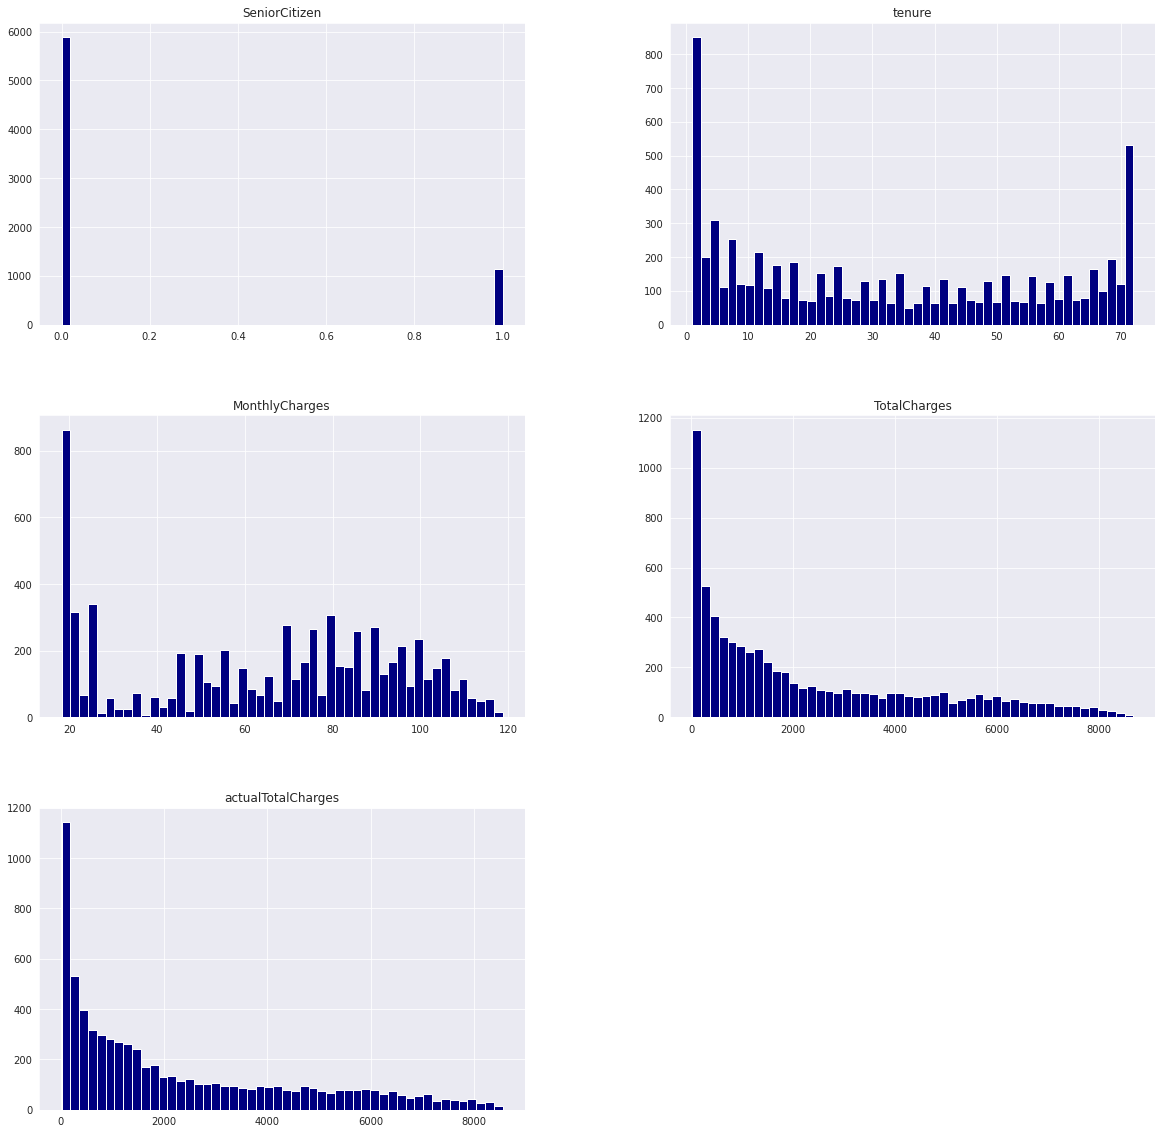

In [ ]:
sns.set_style('dark')
df.hist(bins=50,figsize=(20,20),color='navy')

The feature **Tenure** is following a **Beta distribution**, selected based on least sum square error from below.

,sumsquare_error,aic,bic,kl_div
beta,0.009698,887.286567,-94855.116328,inf
burr,0.016375,879.649434,-91171.142904,inf
gamma,0.021255,952.284313,-89345.808904,inf
lognorm,0.021984,1306.727003,-89108.632404,inf
norm,0.030109,900.368051,-86905.971205,inf


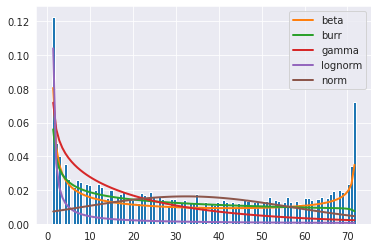

In [ ]:
f = Fitter(df.tenure,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()

f.summary()

The feature **MonthlyCharges** is following a **Beta distribution**, as it has the least sum square error from the below function.

,sumsquare_error,aic,bic,kl_div
beta,0.014314,938.120300,-92117.219244,inf
burr,0.015784,960.932450,-91429.680678,inf
norm,0.017184,963.090442,-90849.791095,inf
gamma,0.017252,965.277454,-90813.062595,inf
lognorm,0.017273,964.881409,-90804.768173,inf


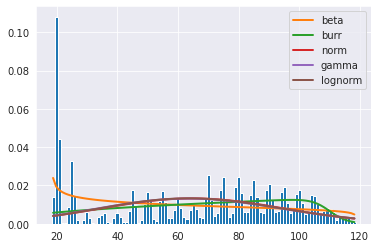

In [ ]:
f = Fitter(df.MonthlyCharges,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()

f.summary()

The feature **TotalCharges** is following a **Beta distribution**, as it has the least sum square error from the below function.

,sumsquare_error,aic,bic,kl_div
beta,2.405758e-07,1909.217847,-169424.915998,0.024425
gamma,2.583759e-07,1944.025257,-168931.830021,0.041400
burr,9.391561e-07,1907.138232,-159847.709531,0.077504
lognorm,9.439229e-07,2287.627084,-159820.965908,0.354204
norm,2.292528e-06,1938.082294,-153589.866521,0.289105


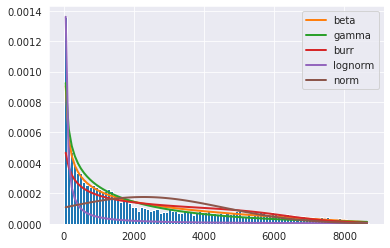

In [ ]:
f = Fitter(df.TotalCharges,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()

f.summary()

The feature **actualTotalCharges** is following a **Beta distribution**, as it has the least sum square error from the below function.

,sumsquare_error,aic,bic,kl_div
beta,2.137642e-07,1883.199233,-170255.831117,0.021678
gamma,2.857216e-07,1941.265733,-168224.392942,0.045466
lognorm,9.608969e-07,2284.468940,-159695.637486,0.360067
burr,9.958881e-07,1899.524491,-159435.260254,0.080047
norm,2.374639e-06,1929.170987,-153342.407694,0.291460


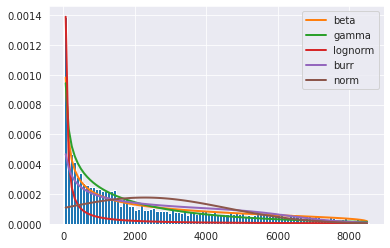

In [ ]:
f = Fitter(df.actualTotalCharges,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()

f.summary()

***Q. What are the distributions of the predictor variables?***


---

From the above distribution plots of each predictor variables we can answer about the distribution type of each predictor variable -> beta distribution

Now that we have seen the distribution of the independent variables, we need to look at visualizations of each with respect to Churn.

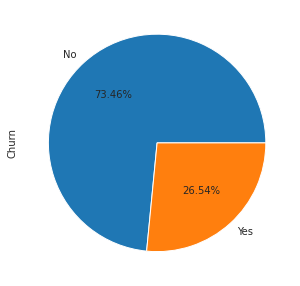

In [ ]:
# Inspecting the Dataset
# The pie plot is for getting an overview of total number of churned/not churned customers
# The autopct set at 2 decimal to get a precise idea of the segregation of target values.
plot = data.Churn.value_counts().plot.pie(y='Churn', figsize=(5, 5), autopct='%.2f%%')

Tenure is an interesting predictor, lets look at the churn with respect to tenure.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


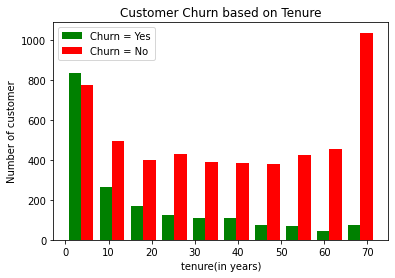

In [ ]:
tenure_churn_no = df[df.Churn == 'No'].tenure
tenure_churn_yes = df[df.Churn == 'Yes'].tenure

plt.xlabel("tenure(in years)")
plt.ylabel("Number of customer")
plt.title("Customer Churn based on Tenure")

plt.hist([tenure_churn_yes, tenure_churn_no], color=['green', 'red'], label=['Churn = Yes', 'Churn = No'])
plt.legend()

Lets plot histogram for same, but this time with monthly charges

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


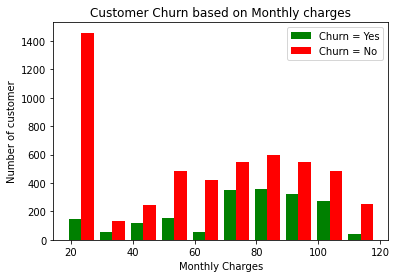

In [ ]:
monthly_charge_churn_no = df[df.Churn == 'No'].MonthlyCharges
monthly_charge_churn_yes = df[df.Churn == 'Yes'].MonthlyCharges

plt.xlabel("Monthly Charges")
plt.ylabel("Number of customer")
plt.title("Customer Churn based on Monthly charges")

plt.hist([monthly_charge_churn_yes, monthly_charge_churn_no], color=['green', 'red'], label=['Churn = Yes', 'Churn = No'])
plt.legend()

**Interpreting the pair plots below** - In order to visualize the relationship between data, seaborn's pairplot functionality has been used. 



1.   The diagonal axis is the histogram for the particular variable plotted against the number of occurrences.
2.   The bottom left and bottom right plots capture the same information, except the axis is flipped.

Here, plotting for Churn, tenure and monthly charges.



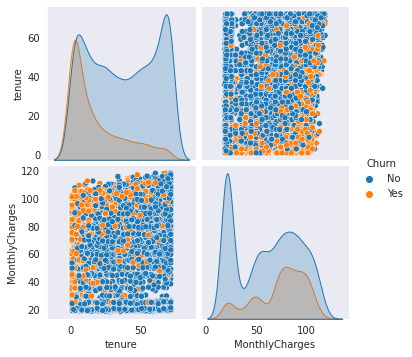

In [ ]:
 # pairplot plots pairwise relationships in the data, hue is the name of the target variable in the data.
 # reference - https://seaborn.pydata.org/generated/seaborn.pairplot.html
sns.pairplot(df[['Churn', 'tenure', 'MonthlyCharges']], hue="Churn")

Inference from the above pair-plots -


*   The diagonal plots top-left and bottom-right give the **density plot of data**. Considering just the **monthly charges** as a variable we see that for lower monthly charges the churn is less and higher for the contrary. Now, considering just the **tenure** as the variable, we see that distribution of churned clients is uniform, whereas for non-churned client is right-skewed.

*   The bottom-left and top-right plots state a common fact - customers with **less tenure** with the company and **higher monthly charges** have **churned**!

This will be further understood by a box plot of the same.




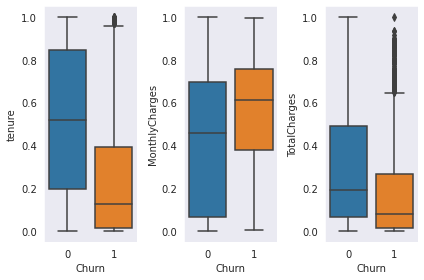

In [ ]:
# To organize our plots and keep them in the same figure
# reference - https://seaborn.pydata.org/generated/seaborn.boxplot.html
fig, axs = plt.subplots(ncols=3)
# First box plot of tenure vs churn
sns.boxplot(x='Churn', y='tenure', data=df, ax=axs[0])
# Second box plot for monthly charges vs churn
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, ax=axs[1])
# # Third box plot for total charges vs churn
sns.boxplot(x='Churn', y='TotalCharges', data=df, ax=axs[2])




# this prevents plots from overlapping
plt.tight_layout()

**Interpreting Box plot-**



*   The first box plot is comparing the tenure quartiles between the two groups. What we can see is that - median tenure for churned customers is a lot shorter than unchurned customers. Approx. 75% of the customers end up leaving the Telco within first 30 months of joining.
*   The second box compares the monthly charges vs churn. The median monthly charges of churned customers is significantly higher than those who didn't churn. 
*   The third box plot is for total charges against churn, we can see that relation between monthly charges, tenure is reflected on total charges. Such that median total charges is way shorter for churned customers, indicating that they churned earlier.

Further cementing the fact that in order to retain customers offers, promotions and perks are necessary.

*As we can see, there may be outliers in our dataset, which can be handled upon doing performance metrics step.*



**Demographic Variables:**

From the dataset we can also examine the categorical variables, starting with demographic variables like - Gender, SeniorCitizen, Partner, Dependents. 



In [ ]:
# Code courtesy - https://gist.github.com/edwardcqian/359b0a4447ab9121e4dc08663bbd0df4#file-cp6-py
# reference - https://seaborn.pydata.org/generated/seaborn.countplot.html
'''
this snippet of code helps organize our plots and keep them in the same figure
columns: List[str] - each column is its own chart
title: str - title is used as the title of each chart
function only works for 3 or more columns
'''
def plot_categoricals(columns, title):
  fig, axs = plt.subplots(ncols=2, nrows=int(len(columns) / 2) + len(columns) % 2)
  fig.set_size_inches(15, 15)

  row = col = 0
  for column in columns:
    plot_title = '{}: {}'.format(title, column)
    sns.countplot(x=column, hue="Churn", data=data, ax=axs[row][col]).set_title(plot_title)

    if col == 1:
      col = 0
      row += 1
    else:
      col += 1

  # this prevents plots from overlapping
  plt.tight_layout()

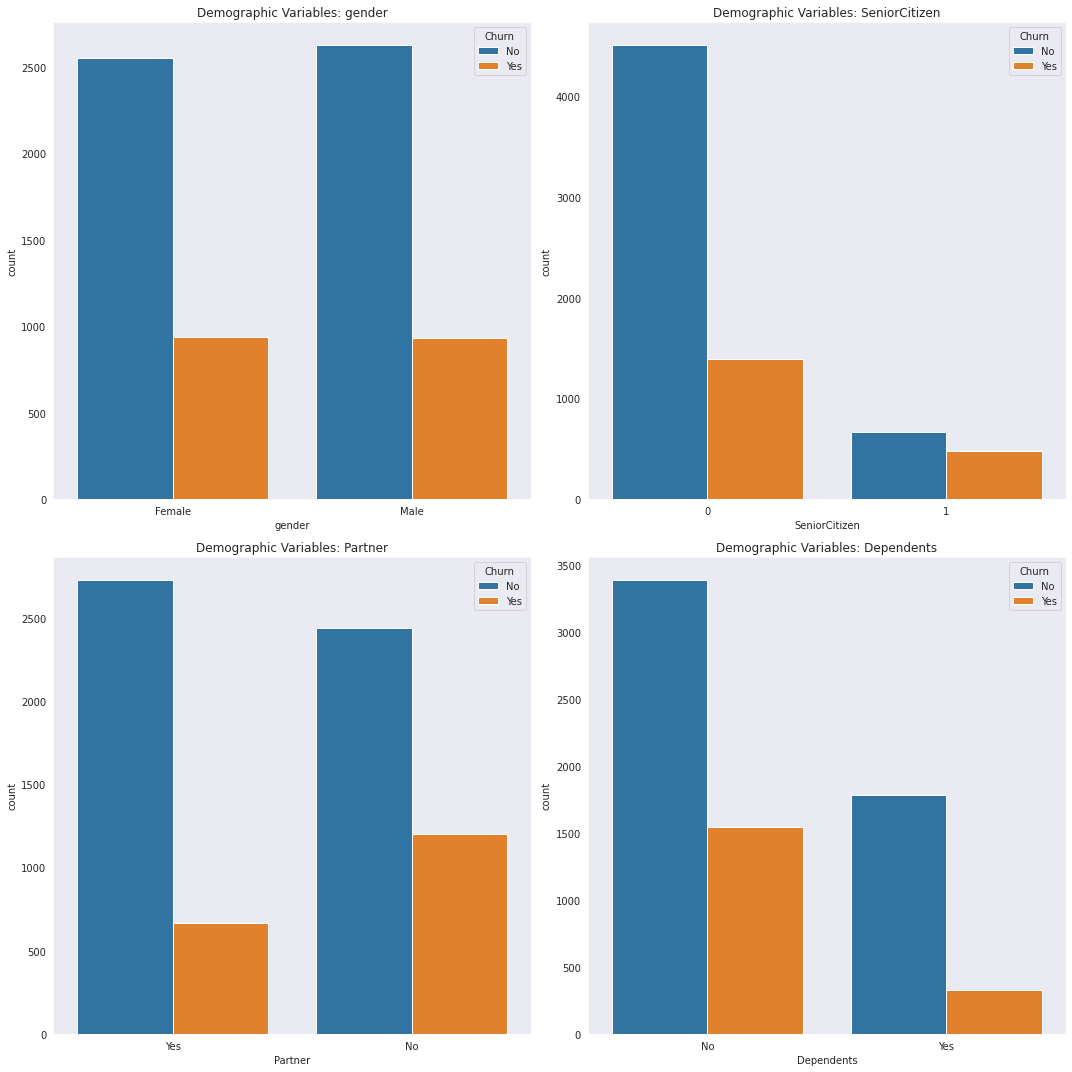

In [ ]:
# plot demographic features
plot_categoricals(['gender', 'SeniorCitizen', 'Partner', 'Dependents'], 'Demographic Variables')

**Inferring the demographic plot-**



*   For the top-left plot of count vs gender in analysis of churn, there is very **little** difference in churn propotions between males and females.
*   There is a **higher** proportion of churn amongst senior citizens(top-right chart), customers with no partners(bottom-left chart) and customers with no dependents(bottom-right chart).

**Note:** 

*What is particularly insightful is that non-senior citizens with no partners and no dependents are an intersection of customers that indicate less frequent churn and speaks positively towards customer retention for the Telco.*


**Other Categorical Variables -**

The other categorical variables can be divided between service and billing
information.

**Service Variables** include - 

*Phone Service, Multiple Lines, Internet Service, Online Security, Online Backup, Device Protection, Tech Support, Streaming TV and Streaming Movies*

**Billing Variables** include - 

*Contract, Paperless Billing and Payment Method*

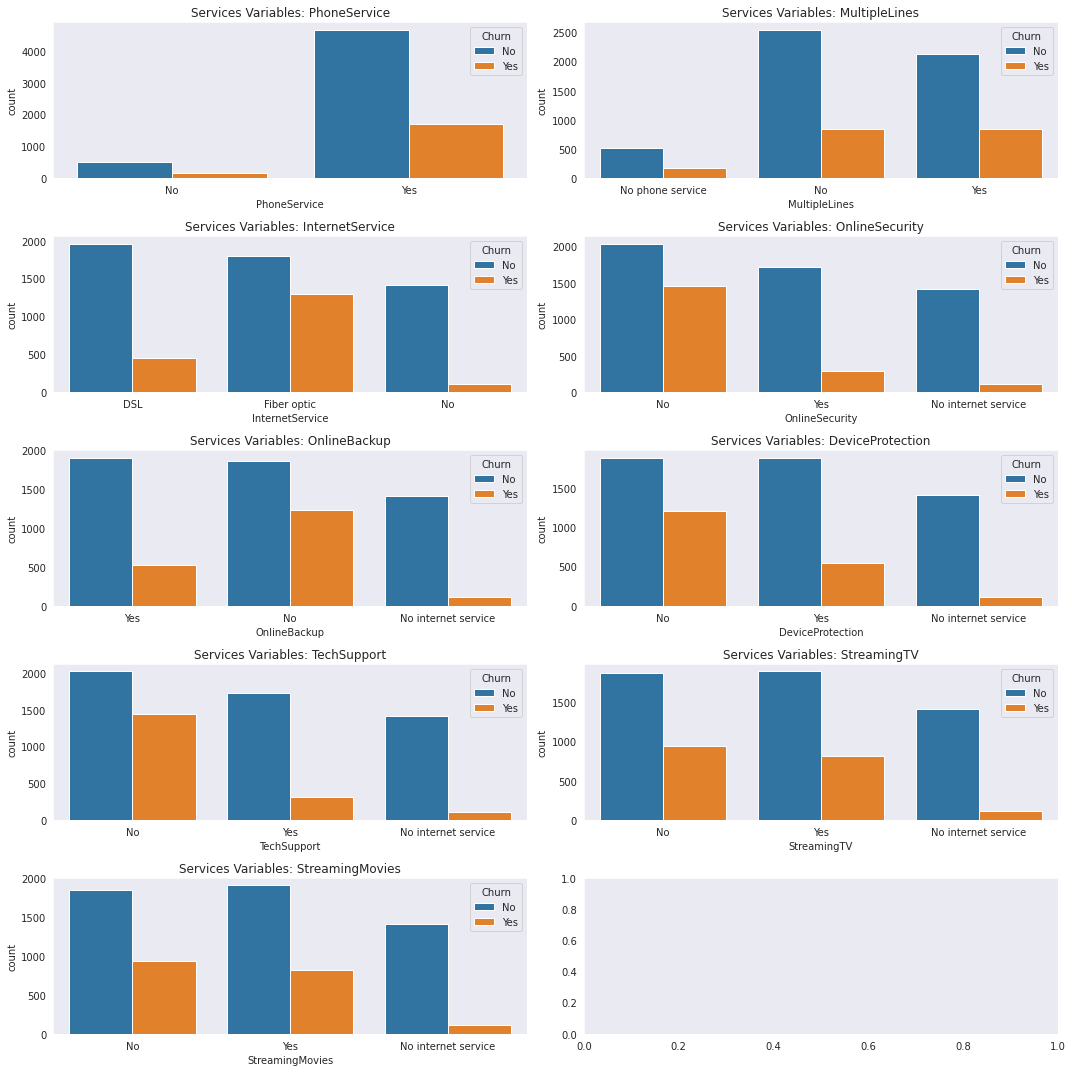

In [ ]:
# Plot service features
plot_categoricals(['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'], 'Services Variables')

**Interpreting from the plots -**



*   Significantly more customers with only phone service will NOT churn than those of other customers.
*   Customers with multiple lines churn at approximately the same rate as those with a single line.
*   For services like online backup, device protection and tech support there is a **higher** churn rate with users who dont use these services, reason being they were not interested in staying long enough to benefit from them.
*  Customers with TV Streaming and/or Movie Streaming services churn more than all other services offered by Telco.


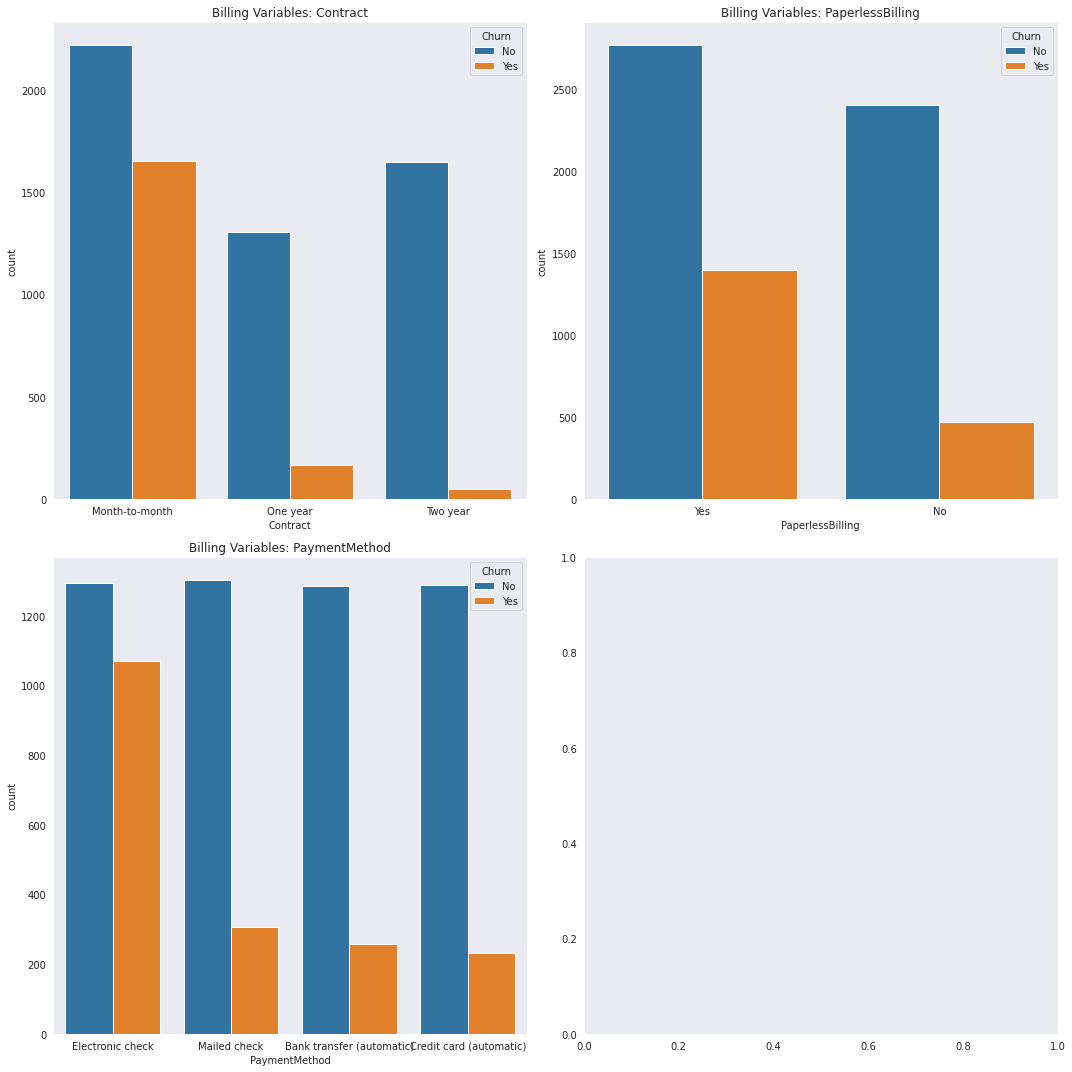

In [ ]:
# plot billing features
plot_categoricals(['Contract', 'PaperlessBilling', 'PaymentMethod'], 'Billing Variables')

**Interpreting the plots -** 



*   The top-left chart compares churn across contract type. To no surprise, *Customers with contract of month-to-month churned **more**, as they are not bound by staying with the company.*
Those with longer plans face additional barriers/penalties when cancelling prematurely.
*   Those who opted for paperless billing are **more** frequent to churn as well as those who pay by Electronic cheque. This gives some indication that these behaviours may be corelated with other variables. ie., *Older customers might have preferred towards paper bills*





## 5. Feature Selection

The plotting and visualization has given a fair idea of what are the important features to comnsider when we move ahead to make our Model.

We can use this information in conjuncture with **Chi-squared test** to make a more informed decision about what features to select.

*We can only use Chi-squared test for assessing categorical values and their significance.*

**NOTE**: *As we make a model and find the Gini importance, we can know that its more reliable in stating the significant independent predictors in predicting the target.*

**About Chi-Squared Test**- 


*Its a way to compare when you collect data, is the variation in the data just due to chance or is it due to one of the feature variables that you are actually testing.*

$x^2_c=\sum \frac{(O_i - E_i)^2}{E_i}$

$x^2_c$ - Chi Squared

$O_i$ - Observed data value

$E_i$ - Expected values

We need to understand p-values to interpret the Chi-sqauared output.

*References* -

https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

### Preparing the Dataset for Data Modeling

In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [ ]:
y = df['Churn']
X = df.drop(columns='Churn')

# partition training and testing set
# Split the data into training and testing (80/20 is a good starting point)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)


# Feature Selection 
# Reference - https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

feature_selector = SelectKBest(chi2, k='all')
X_kbest = feature_selector.fit(X_train, y_train)
p_values = feature_selector.pvalues_

In [ ]:
X_train.shape

(5625, 26)

In [ ]:
X_test.shape

(1407, 26)

**Q. Do the testing and training have same data?**

In terms of their sizes, the *train_test_split* function and *random_state* param make sure that the entire dataset is diivided into *2 parts - 80% training and 20% testing data*. As far as the similarity in distribution of the two split train and test, we can see their distributions.


Lets look at their distributions

1. Training data after split

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f80d12f4510>,
      dtype=object)

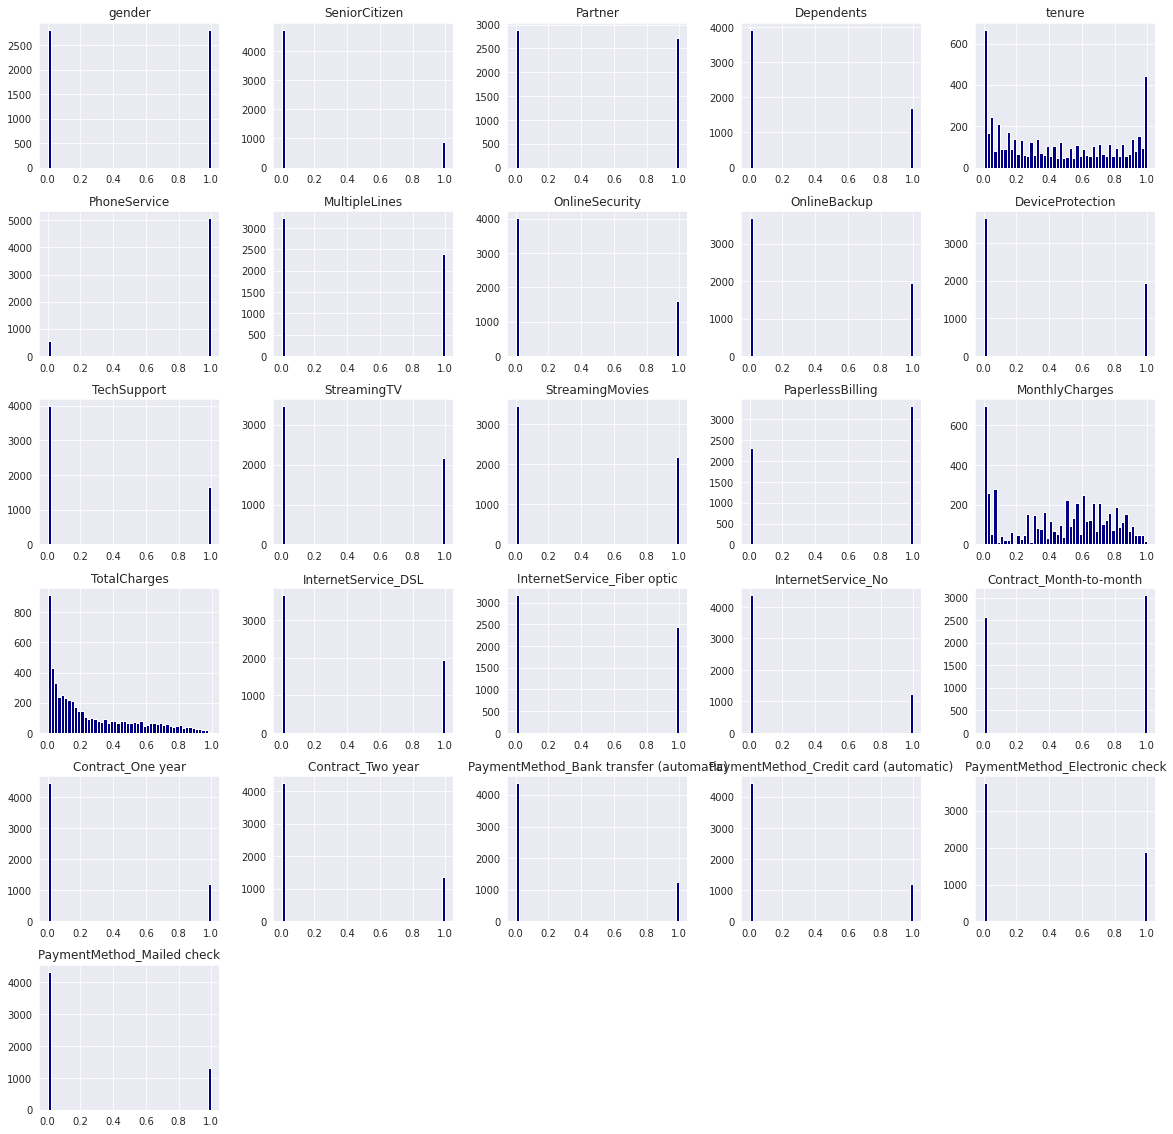

In [ ]:
sns.set_style('dark')
X_train.hist(bins=50,figsize=(20,20),color='navy')

2. Testing data after split

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f80d019b390>,
      dtype=object)

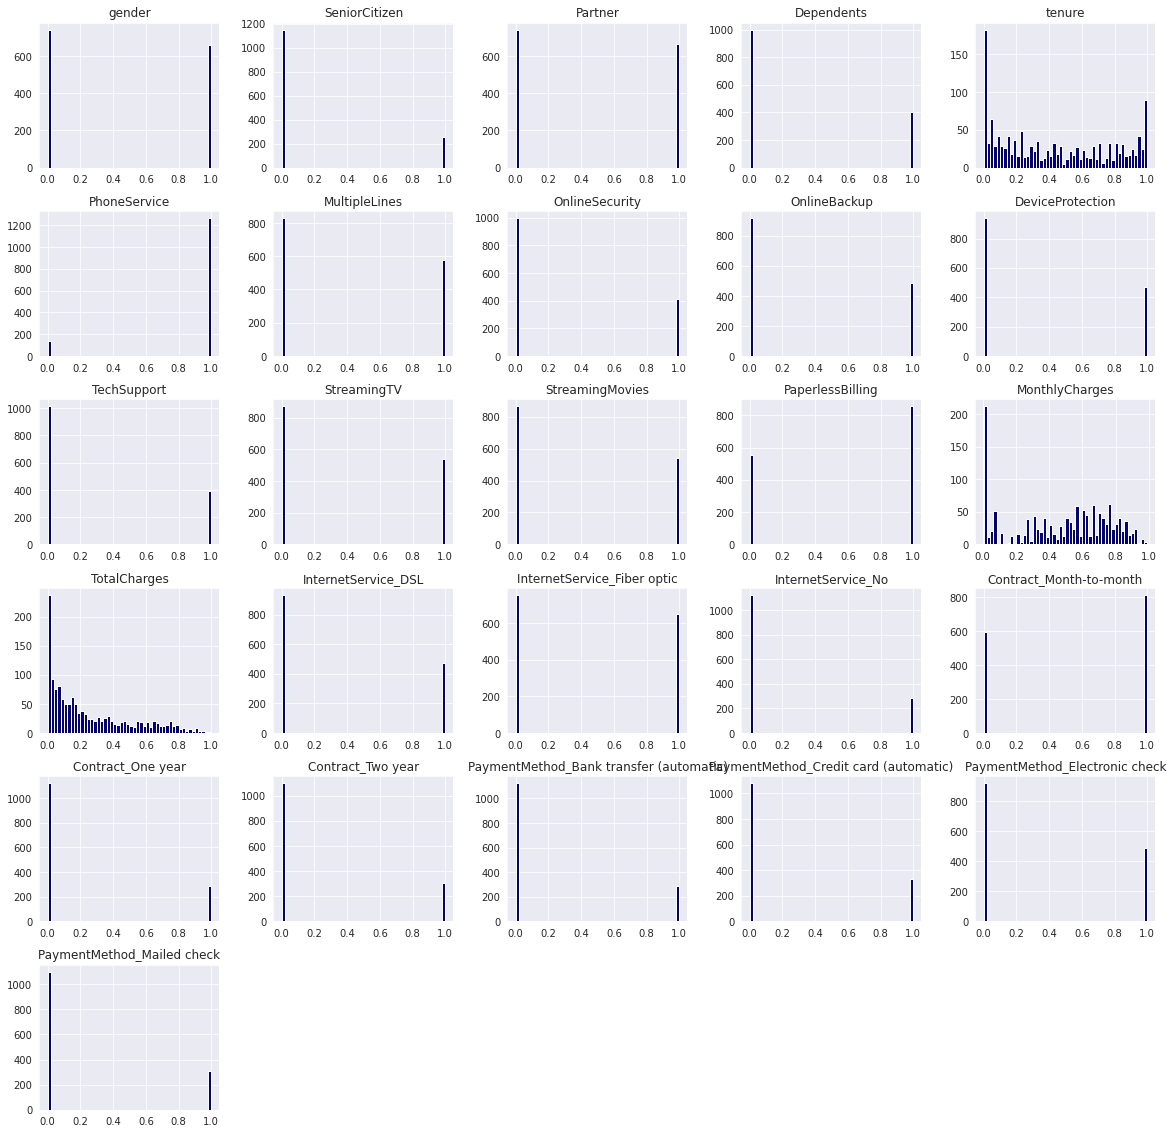

In [ ]:
sns.set_style('dark')
X_test.hist(bins=50,figsize=(20,20),color='navy')

Looking at both distribution sets, we can see that they are the same, with a change that the count of the testing distributions is lesser because they are 20% of the total dataset.


In [ ]:
print(feature_selector.pvalues_)

[2.58925687e-01 1.30129863e-25 3.77525936e-16 6.80122834e-23
 1.00568710e-42 7.67215395e-01 4.36973984e-02 1.74030396e-29
 3.70570580e-07 4.61097340e-06 9.18332815e-27 3.38311818e-04
 1.84261292e-04 1.52288870e-20 5.55888764e-10 1.45829535e-14
 3.55181953e-14 5.77170319e-66 2.11801625e-48 1.70255488e-89
 1.91977460e-28 6.37076548e-86 6.07227069e-14 9.70096398e-19
 1.06373309e-76 1.21723528e-10]


In [ ]:
from tabulate import tabulate
from prettytable import PrettyTable

+-----------------------------------------+------------------------+
|                 coloumn                 |        p-value         |
+-----------------------------------------+------------------------+
|                  gender                 |  0.25892568662237514   |
|              SeniorCitizen              | 1.301298626527354e-25  |
|                 Partner                 | 3.7752593645029754e-16 |
|                Dependents               | 6.801228340742228e-23  |
|                  tenure                 | 1.0056870968504485e-42 |
|               PhoneService              |   0.7672153951953352   |
|              MultipleLines              |  0.04369739837469758   |
|              OnlineSecurity             | 1.7403039623714368e-29 |
|               OnlineBackup              | 3.7057057983775936e-07 |
|             DeviceProtection            | 4.6109733985528786e-06 |
|               TechSupport               | 9.183328154096752e-27  |
|               StreamingTV       

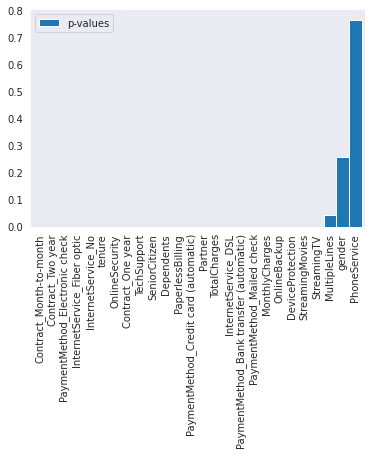

In [ ]:
# get pvalues corresponding to coloumns

t = PrettyTable(['coloumn', 'p-value'])
p_morethan_0_05 = PrettyTable(['coloumn', 'p-value > 0.05'])


pvalue_features = feature_selector.pvalues_
count = 0
# summarize feature pvalues
# print(tabulate([],headers=['Coloumn', 'p-value']))
for i,v in zip(X_train.columns, pvalue_features):
  t.add_row([i,v])
  if(v>0.05):
    p_morethan_0_05.add_row([i,v])
    count+=1
  

print(t)
print(p_morethan_0_05)
print('No. of features with pvalue > 0.05 : ', count)

  # print(tabulate([[i,v]]))
	# print('Feature: %s, Score: %.5f' % (i,v))
# plot feature importance
# pyplot.bar([x for x in range(len(pvalue_features))], pvalue_features)
# pyplot.show()



feats = {} # a dict to hold feature_name: pvalue
for feature, pvalue_feature in zip(X_train.columns, pvalue_features):
    feats[feature] = pvalue_feature #add the name/value pair 

pvalues_col = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'p-values'})
pvalues_col.sort_values(by='p-values').plot(kind='bar', width=1,rot=90)

In [ ]:
from scipy.stats import spearmanr
# prepare data
data1 = X_train.MonthlyCharges
# data2 = X_train.actualTotalCharges

data3 = X_train.TotalCharges
data4 = X_train.tenure


# calculate spearman's correlation
corr, _ = spearmanr(data1, data4)
print('Spearmans correlation - Monthly charges & tenure: %.3f' % corr)
corr1, _ = spearmanr(data3, data4)
print('Spearmans correlation - total charges & tenure: %.3f' % corr1)
corr2, _ = spearmanr(data1, data3)
print('Spearmans correlation - monthly charges & total charges: %.3f' % corr2)


Spearmans correlation - Monthly charges & tenure: 0.285
Spearmans correlation - total charges & tenure: 0.890
Spearmans correlation - monthly charges & total charges: 0.644


In [ ]:
X_train.columns
# X_train.isnull().sum() -> all 0

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

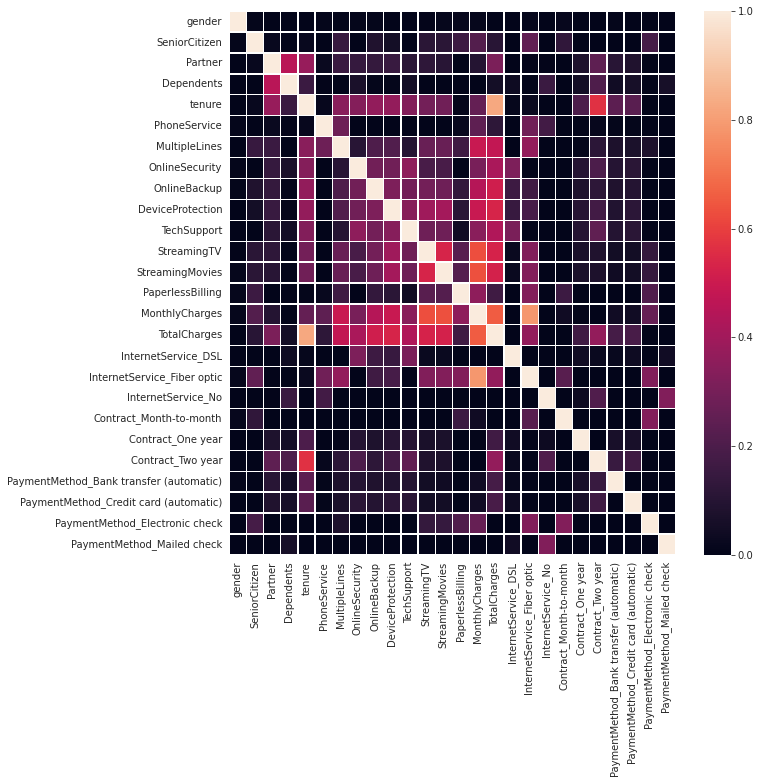

In [133]:
# Get sns heatmap of the data
# snsHeatmapData = pd.read_csv('https://raw.githubusercontent.com/kshitijzutshi/Teleco-Customer-Churn-Prediction/main/dataset/Telco-Customer-Churn.csv')
fig, ax = plt.subplots(figsize=(10,10)) 
ax = sns.heatmap(X_train.corr(), linewidths=.3, vmin=0, vmax=1)


In [ ]:
X_train.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
gender,1.000000,0.007961,-0.000087,-0.008572,-0.014896,0.009434,0.001718,0.010685,0.008660,0.001159,-0.004288,0.006740,0.015092,0.011919,0.014350,-0.007637,-0.008177,0.013488,-0.006755,0.015973,-0.008535,-0.010404,0.011177,-0.000263,0.001630,-0.012631
SeniorCitizen,0.007961,1.000000,0.023254,-0.210534,0.020640,0.001908,0.148141,-0.040229,0.084753,0.054675,-0.058493,0.111550,0.112041,0.159199,0.218137,0.106442,-0.102836,0.252356,-0.183930,0.128463,-0.032311,-0.118144,-0.023849,-0.019239,0.180869,-0.160285
Partner,-0.000087,0.023254,1.000000,0.453625,0.376347,0.026430,0.152485,0.144226,0.137447,0.149328,0.112373,0.124299,0.107162,-0.011373,0.095727,0.314373,-0.010345,0.004470,0.006523,-0.278558,0.080940,0.245864,0.105769,0.084774,-0.087338,-0.089148
Dependents,-0.008572,-0.210534,0.453625,1.000000,0.154695,0.005957,-0.019082,0.066617,0.008162,0.008788,0.049913,-0.027253,-0.052105,-0.117483,-0.123147,0.051358,0.038723,-0.164889,0.152851,-0.222259,0.054198,0.206023,0.046852,0.059669,-0.148129,0.061607
tenure,-0.014896,0.020640,0.376347,0.154695,1.000000,0.018921,0.344955,0.333592,0.364372,0.369346,0.330022,0.295964,0.288942,0.009500,0.259138,0.826887,0.011829,0.025418,-0.043988,-0.653620,0.200168,0.567184,0.240517,0.231631,-0.206698,-0.231379
PhoneService,0.009434,0.001908,0.026430,0.005957,0.018921,1.000000,0.280100,-0.078596,-0.049593,-0.065555,-0.095480,-0.021041,-0.027173,0.022136,0.246093,0.118508,-0.448774,0.285744,0.173112,-0.013387,-0.000213,0.015708,0.011250,0.008161,-0.006030,-0.012302
MultipleLines,0.001718,0.148141,0.152485,-0.019082,0.344955,0.280100,1.000000,0.108792,0.205864,0.213865,0.099309,0.266236,0.269509,0.166905,0.494414,0.477533,-0.198283,0.367206,-0.211814,-0.109047,0.011534,0.115366,0.078101,0.070476,0.077830,-0.232866
OnlineSecurity,0.010685,-0.040229,0.144226,0.066617,0.333592,-0.078596,0.108792,1.000000,0.291561,0.286934,0.356482,0.191121,0.188363,-0.002319,0.307565,0.419140,0.316694,-0.023086,-0.335807,-0.255466,0.099760,0.201261,0.099967,0.112065,-0.108662,-0.086018
OnlineBackup,0.008660,0.084753,0.137447,0.008162,0.364372,-0.049593,0.205864,0.291561,1.000000,0.318488,0.294561,0.293518,0.285145,0.135470,0.448205,0.513971,0.161527,0.166840,-0.384987,-0.169345,0.079427,0.120799,0.084224,0.094440,0.001825,-0.177068
DeviceProtection,0.001159,0.054675,0.149328,0.008788,0.369346,-0.065555,0.213865,0.286934,0.318488,1.000000,0.339134,0.396331,0.407669,0.112280,0.493218,0.533468,0.144886,0.184576,-0.387111,-0.235521,0.104059,0.174081,0.086653,0.113495,-0.011384,-0.183177


***Q. Is there any predictor variables independent of all the other predictor variables?***


---


From the sns heatmap correlation we can see that for features with correlation value of 1 or almost 1 indicates its highly correlated to itself, hence is independent of all other predictor variables.

In the heatmap we can see some coorelations nearing to 1 but are in range of 0.7-0.8 meaning they are not highly correlated. 

To summarize, there are predictor variables that are independent of other predictors.


In [ ]:
y_train.shape

(5625,)

In [ ]:
X_train.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
gender,1.000000,0.007961,-0.000087,-0.008572,-0.014896,0.009434,0.001718,0.010685,0.008660,0.001159,-0.004288,0.006740,0.015092,0.011919,0.014350,-0.007637,-0.008177,0.013488,-0.006755,0.015973,-0.008535,-0.010404,0.011177,-0.000263,0.001630,-0.012631
SeniorCitizen,0.007961,1.000000,0.023254,-0.210534,0.020640,0.001908,0.148141,-0.040229,0.084753,0.054675,-0.058493,0.111550,0.112041,0.159199,0.218137,0.106442,-0.102836,0.252356,-0.183930,0.128463,-0.032311,-0.118144,-0.023849,-0.019239,0.180869,-0.160285
Partner,-0.000087,0.023254,1.000000,0.453625,0.376347,0.026430,0.152485,0.144226,0.137447,0.149328,0.112373,0.124299,0.107162,-0.011373,0.095727,0.314373,-0.010345,0.004470,0.006523,-0.278558,0.080940,0.245864,0.105769,0.084774,-0.087338,-0.089148
Dependents,-0.008572,-0.210534,0.453625,1.000000,0.154695,0.005957,-0.019082,0.066617,0.008162,0.008788,0.049913,-0.027253,-0.052105,-0.117483,-0.123147,0.051358,0.038723,-0.164889,0.152851,-0.222259,0.054198,0.206023,0.046852,0.059669,-0.148129,0.061607
tenure,-0.014896,0.020640,0.376347,0.154695,1.000000,0.018921,0.344955,0.333592,0.364372,0.369346,0.330022,0.295964,0.288942,0.009500,0.259138,0.826887,0.011829,0.025418,-0.043988,-0.653620,0.200168,0.567184,0.240517,0.231631,-0.206698,-0.231379
PhoneService,0.009434,0.001908,0.026430,0.005957,0.018921,1.000000,0.280100,-0.078596,-0.049593,-0.065555,-0.095480,-0.021041,-0.027173,0.022136,0.246093,0.118508,-0.448774,0.285744,0.173112,-0.013387,-0.000213,0.015708,0.011250,0.008161,-0.006030,-0.012302
MultipleLines,0.001718,0.148141,0.152485,-0.019082,0.344955,0.280100,1.000000,0.108792,0.205864,0.213865,0.099309,0.266236,0.269509,0.166905,0.494414,0.477533,-0.198283,0.367206,-0.211814,-0.109047,0.011534,0.115366,0.078101,0.070476,0.077830,-0.232866
OnlineSecurity,0.010685,-0.040229,0.144226,0.066617,0.333592,-0.078596,0.108792,1.000000,0.291561,0.286934,0.356482,0.191121,0.188363,-0.002319,0.307565,0.419140,0.316694,-0.023086,-0.335807,-0.255466,0.099760,0.201261,0.099967,0.112065,-0.108662,-0.086018
OnlineBackup,0.008660,0.084753,0.137447,0.008162,0.364372,-0.049593,0.205864,0.291561,1.000000,0.318488,0.294561,0.293518,0.285145,0.135470,0.448205,0.513971,0.161527,0.166840,-0.384987,-0.169345,0.079427,0.120799,0.084224,0.094440,0.001825,-0.177068
DeviceProtection,0.001159,0.054675,0.149328,0.008788,0.369346,-0.065555,0.213865,0.286934,0.318488,1.000000,0.339134,0.396331,0.407669,0.112280,0.493218,0.533468,0.144886,0.184576,-0.387111,-0.235521,0.104059,0.174081,0.086653,0.113495,-0.011384,-0.183177


In [ ]:
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)

(5625, 26) (5625,)


In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print('Accuracy: ')
print('{}'.format(accuracy_score(y_test, y_pred)))
print('Classification report: ')
print('{}'.format(classification_report(y_test, y_pred)))
print('Confusion Matrix')
print('{}'.format(confusion_matrix(y_test, y_pred)))
print('\n')
clf_rfc = confusion_matrix(y_test, y_pred)
print('True Positives : ',clf_rfc[0][0])
print('False Negatives : ',clf_rfc[0][1])
print('False Positives : ',clf_rfc[1][0])
print('True Negatives : ',clf_rfc[1][1])
print('\n')
print('Cohen kappa score: ')
print('{}'.format(cohen_kappa_score(y_test, y_pred)))

Accuracy: 
0.7711442786069652
Classification report: 
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       999
           1       0.64      0.48      0.55       408

    accuracy                           0.77      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.76      0.77      0.76      1407

Confusion Matrix
[[889 110]
 [212 196]]


True Positives :  889
False Negatives :  110
False Positives :  212
True Negatives :  196


Cohen kappa score: 
0.3998505766311389


Feature: PhoneService, Score: 0.00571
Feature: PaymentMethod_Bank transfer (automatic), Score: 0.00815
Feature: PaymentMethod_Mailed check, Score: 0.00869
Feature: PaymentMethod_Credit card (automatic), Score: 0.00894
Feature: DeviceProtection, Score: 0.01143
Feature: Dependents, Score: 0.01261
Feature: Partner, Score: 0.01329
Feature: StreamingMovies, Score: 0.01335
Feature: StreamingTV, Score: 0.01380
Feature: OnlineBackup, Score: 0.01388
Feature: MultipleLines, Score: 0.01430
Feature: gender, Score: 0.01479
Feature: SeniorCitizen, Score: 0.01512
Feature: Contract_One year, Score: 0.01724
Feature: InternetService_DSL, Score: 0.01756
Feature: TechSupport, Score: 0.02000
Feature: OnlineSecurity, Score: 0.02326
Feature: PaperlessBilling, Score: 0.02440
Feature: InternetService_No, Score: 0.02488
Feature: Contract_Two year, Score: 0.04492
Feature: PaymentMethod_Electronic check, Score: 0.05194
Feature: InternetService_Fiber optic, Score: 0.07005
Feature: Contract_Month-to-month, Score: 0

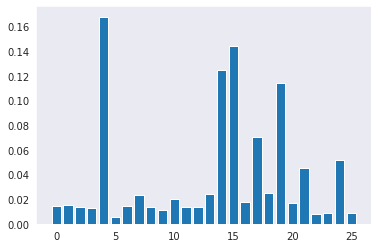

In [ ]:
# get importance
importance = rfc.feature_importances_
# summarize feature importance
for i,v in sorted(zip(X_train.columns, rfc.feature_importances_), key = lambda x: x[1]):
	print('Feature: %s, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
X_train.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

Lets sort these importances using **Gini Importance**

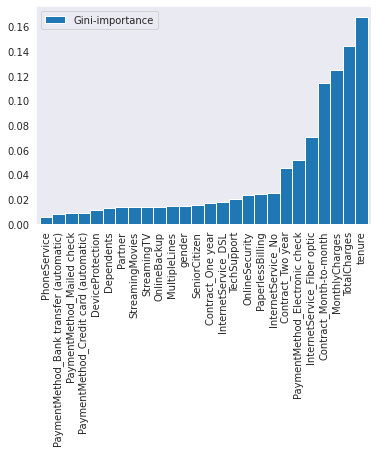

In [ ]:
import pandas as pd
%matplotlib inline
#do code to support model
#"data" is the X dataframe and model is the SKlearn object

feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_train.columns, rfc.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', width=1,rot=90)

importance_features = ['TotalCharges', 'MonthlyCharges', 'tenure', 'Contract_Month-to-month', 'InternetService_Fiber optic', 'PaymentMethod_Electronic check', 'gender','Contract_Two year', 'PaperlessBilling', 'Partner' ]

***Q. Which independent variables are useful to predict a target (dependent variable)?***


---

Although the p-value ffrom the selectKbest feature selector is a good metric for selection of independent variables, having used the Random Forest Classifier to get the feature importance values - Gini importance, Its a more reliable source for deciding the useful predictors.

Based on Gini importance we can see that following features are important - 



```
'TotalCharges', 'MonthlyCharges', 'tenure', 'Contract_Month-to-month', 

'InternetService_Fiber optic', 'PaymentMethod_Electronic check', 'gender',

'Contract_Two year', 'PaperlessBilling', 'Partner'
```




**Q. Which predictor variables are the most important?**

From the above list of useful predictors, we can take the top 5 that are most important based on Gini importance.



```
'TotalCharges', 'MonthlyCharges', 'tenure', 'Contract_Month-to-month', 

'InternetService_Fiber optic'
```
Also to note that these variables cement the idea that we got from ploting and Visualization of data.


In [ ]:
# from sklearn.model_selection import RandomizedSearchCV
# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]# Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
               
# print(random_grid)


# grid = RandomizedSearchCV(RandomForestClassifier(), random_grid, verbose=3)
# grid.fit(X_train, y_train)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=False 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=False, score=0.781, total=   6.9s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=False 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.9s remaining:    0.0s


[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=False, score=0.816, total=   6.9s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=False 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   13.9s remaining:    0.0s


[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=False, score=0.792, total=   6.8s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=False, score=0.801, total=   6.8s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=False, score=0.788, total=   6.9s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True, score=0.789, total=   2.1s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, m

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  4.6min finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
            

The best parameters after hypertuning the model are - 

```
{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 2000}
```



In [ ]:
# grid.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 2000}

In [ ]:
rfc = RandomForestClassifier(bootstrap=True,
 max_depth=10,
 max_features='sqrt',
 min_samples_leaf=2,
 min_samples_split=2,
 n_estimators=2000)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print('Accuracy: ')
print('{}'.format(accuracy_score(y_test, y_pred)))
print('Classification report: ')
print('{}'.format(classification_report(y_test, y_pred)))
print('Confusion Matrix')
print('{}'.format(confusion_matrix(y_test, y_pred)))
print('\n')
clf_rfc = confusion_matrix(y_test, y_pred)
print('True Positives : ',clf_rfc[0][0])
print('False Negatives : ',clf_rfc[0][1])
print('False Positives : ',clf_rfc[1][0])
print('True Negatives : ',clf_rfc[1][1])
print('\n')
print('Cohen kappa score: ')
print('{}'.format(cohen_kappa_score(y_test, y_pred)))

Accuracy: 
0.7846481876332623
Classification report: 
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       999
           1       0.67      0.50      0.58       408

    accuracy                           0.78      1407
   macro avg       0.74      0.70      0.72      1407
weighted avg       0.77      0.78      0.77      1407

Confusion Matrix
[[898 101]
 [202 206]]


True Positives :  898
False Negatives :  101
False Positives :  202
True Negatives :  206


Cohen kappa score: 
0.43570489733194084


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f80cd998190>,
      dtype=object)

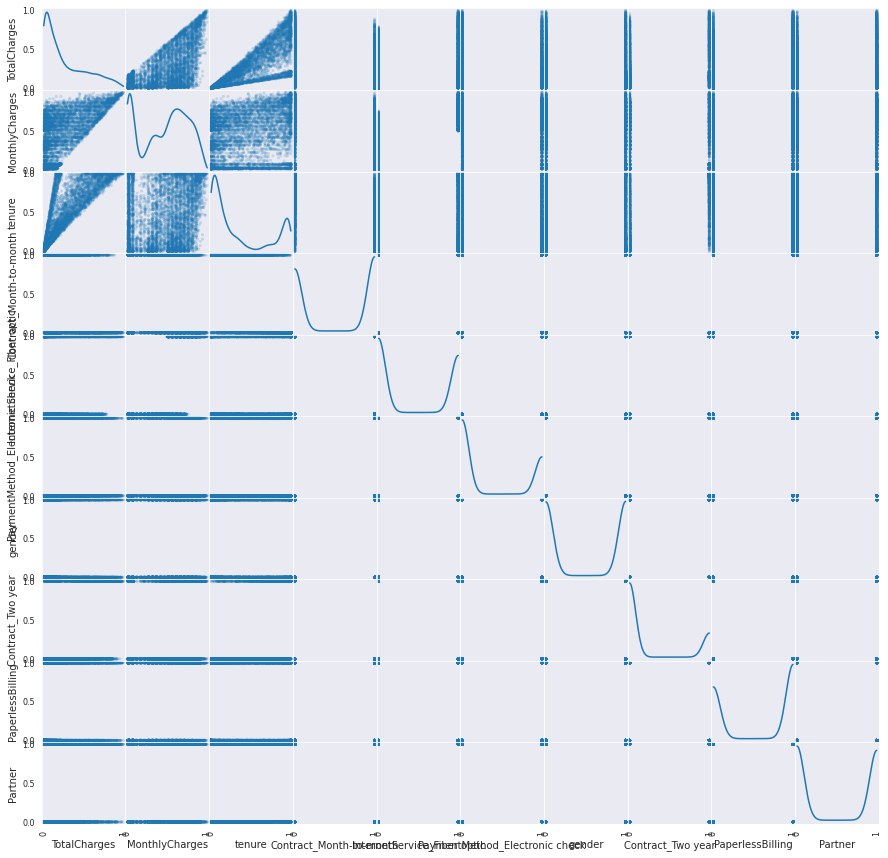

In [ ]:
X_train_sel = X_train[['TotalCharges', 'MonthlyCharges', 'tenure', 'Contract_Month-to-month', 'InternetService_Fiber optic', 'PaymentMethod_Electronic check', 'gender','Contract_Two year', 'PaperlessBilling', 'Partner']]
X_test_sel = X_test[['TotalCharges', 'MonthlyCharges', 'tenure', 'Contract_Month-to-month', 'InternetService_Fiber optic', 'PaymentMethod_Electronic check', 'gender','Contract_Two year', 'PaperlessBilling', 'Partner']]
X_train_sel
scatter_matrix(X_train_sel, alpha=0.2, figsize=(15, 15), diagonal='kde')

In [ ]:
X_train.describe()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000
mean,0.501511,0.157689,0.484978,0.300978,0.445438,0.904000,0.424889,0.285511,0.344356,0.346844,0.292622,0.385244,0.388978,0.588978,0.461384,0.263369,0.345244,0.434667,0.220089,0.544356,0.210844,0.244800,0.223644,0.212089,0.333867,0.230400
std,0.500042,0.364481,0.499819,0.458724,0.346419,0.294617,0.494370,0.451698,0.475200,0.476008,0.455007,0.486696,0.487562,0.492063,0.300924,0.264097,0.475490,0.495757,0.414343,0.498073,0.407944,0.430007,0.416724,0.408824,0.471635,0.421126
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.112676,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.044115,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.394366,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.517413,0.158753,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,0.774648,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.711940,0.441957,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.998575,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


***Q. Do the training and test sets have the same data?***


---


Using the `train_test_split` function from the scikit learn library and using the params passsed in the function like - `test_size` and `random state`, the data was split in a **shuffled/random** way in the ratio of **80/20**, Thus making sure that **train and test DONT have same data values but the distribution of the data points is same**.


## Conclusion

After performing the following steps on the dataset of telco churn prediction - 

1. Data Cleaning
2. Exploratory Data analysis
3. Feature Selection by building Random Forest Classifier Model

We were able to answer the questions related to - 

- Missing data
- Useful and most important independent features to predict the target
- train and test split
- Range and distribution of predictor variables

## Licensing & Citation


scikit-learn citations: http://scikit-learn.org/stable/about.html#citing-scikit-learn

https://github.com/edwardcqian for using the github gists code snippets for the work.

`Copyright 2021 Kshitij Zutshi`
```
Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

  http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.
```

